# 1. Read data from .csv file

In [24]:
import pandas as pd
df_HBE_unique = pd.read_csv("Oxidation-HBE-b3lyp-results-clean.csv", usecols = ['Reactant','Potential'])
df_HBE_unique

,Reactant,Potential
0,N(C)(C)C1=CC=C(C(C)([H])C(OC)OCOC)C=C1,0.668574
1,N(C)(C)C1=CC=C(C([H])([H])C([H])OCOC)C=C1,0.698287
2,N(C)(C)C1=CC=C(C([H])([H])C(C2=CC=CC=C2)OC)C=C1,0.709715
3,N(C)(C)C1=CC=C(C(C)(C)C(C)OC)C=C1,0.711919
4,N(C)(C)C1=CC=C(C(C2=CC=CC=C2)(C)C(C)OC)C=C1,0.715429
...,...,...
1419,C(#N)C1=CC=C(C(C#N)(C#N)C(C#N)OC)C=C1,3.318583
1420,C(#N)C1=CC=C(C(C#N)(C#N)C(C#N)OCOC)C=C1,3.340215
1421,[N+](=O)([O-])C1=CC=C(C([H])(C#N)C(C#N)OCOC)C=C1,3.349031
1422,[N+](=O)([O-])C1=CC=C(C(C#N)(C#N)C(C#N)OC)C=C1,3.511964


# 2. Generate features 

In [25]:
import rdkit.Chem as Chem
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.rdMolDescriptors as MolDescriptors
import rdkit.Chem.Descriptors as Descriptors
import rdkit.Chem.Fragments as Fragments

def evaluate_chem_mol(mol):
    mol_sssr = Chem.GetSSSR(mol)
#    return Chem.GetSSSR(mol), Crippen.MolLogP(mol)
    clogp    = Crippen.MolLogP(mol)
    mr       = Crippen.MolMR(mol)
    mw       = MolDescriptors.CalcExactMolWt(mol)
    tpsa    = MolDescriptors.CalcTPSA(mol)
    Chi0n    = MolDescriptors.CalcChi0n(mol)
    Chi1n    = MolDescriptors.CalcChi1n(mol)
    Chi2n    = MolDescriptors.CalcChi2n(mol)
    Chi3n    = MolDescriptors.CalcChi3n(mol)
    Chi4n    = MolDescriptors.CalcChi4n(mol)
    Chi0v    = MolDescriptors.CalcChi0v(mol)
    Chi1v    = MolDescriptors.CalcChi1v(mol)
    Chi2v    = MolDescriptors.CalcChi2v(mol)
    Chi3v    = MolDescriptors.CalcChi3v(mol)
    Chi4v    = MolDescriptors.CalcChi4v(mol)
    fracsp3  = MolDescriptors.CalcFractionCSP3(mol)
    Hall_Kier_Alpha = MolDescriptors.CalcHallKierAlpha(mol)    
    Kappa1      = MolDescriptors.CalcKappa1(mol)
    Kappa2      = MolDescriptors.CalcKappa2(mol)
    Kappa3      = MolDescriptors.CalcKappa3(mol)    
    LabuteASA   = MolDescriptors.CalcLabuteASA(mol)  
    Number_Aliphatic_Rings = MolDescriptors.CalcNumAliphaticRings(mol)   
    Number_Aromatic_Rings = MolDescriptors.CalcNumAromaticRings(mol) 
    Number_Amide_Bonds = MolDescriptors.CalcNumAmideBonds(mol) 
    Number_Atom_Stereocenters = MolDescriptors.CalcNumAtomStereoCenters(mol)
    Number_BridgeHead_Atoms = MolDescriptors.CalcNumBridgeheadAtoms(mol)
    Number_HBA = MolDescriptors.CalcNumHBA(mol)
    Number_HBD = MolDescriptors.CalcNumHBD(mol)    
    Number_Hetero_Atoms = MolDescriptors.CalcNumHeteroatoms(mol)
    Number_Hetero_Cycles = MolDescriptors.CalcNumHeterocycles(mol)
    Number_Rings = MolDescriptors.CalcNumRings(mol)
    Number_Rotatable_Bonds = MolDescriptors.CalcNumRotatableBonds(mol)    
    Number_Spiro = MolDescriptors.CalcNumSpiroAtoms(mol)
    Number_Saturated_Rings = MolDescriptors.CalcNumSaturatedRings(mol)
    Number_Heavy_Atoms = Lipinski.HeavyAtomCount(mol)
    Number_NH_OH = Lipinski.NHOHCount(mol)
    Number_N_O = Lipinski.NOCount(mol)
    Number_Valence_Electrons = Descriptors.NumValenceElectrons(mol)
    Max_Partial_Charge = Descriptors.MaxPartialCharge(mol)
    Min_Partial_Charge = Descriptors.MinPartialCharge(mol)
    
    return mol_sssr, clogp, mr, mw, tpsa, Chi0n, Chi1n, Chi2n, Chi3n, Chi4n, Chi0v, Chi1v, Chi2v, Chi3v, Chi4v, fracsp3,\
           Hall_Kier_Alpha,Kappa1, Kappa2, Kappa3, LabuteASA, Number_Aliphatic_Rings, Number_Aromatic_Rings, \
           Number_Amide_Bonds, Number_Atom_Stereocenters, Number_BridgeHead_Atoms, Number_HBA, Number_HBD, \
           Number_Hetero_Atoms, Number_Hetero_Cycles, Number_Rings, Number_Rotatable_Bonds, Number_Spiro,\
           Number_Saturated_Rings, Number_Heavy_Atoms, Number_NH_OH, Number_N_O, Number_Valence_Electrons,\
           Max_Partial_Charge, Min_Partial_Charge

fr_C_O = []
fr_C_O_noCOO = []
fr_Al_OH = []
fr_Ar_OH = []
fr_methoxy = []
fr_oxime = []
fr_ester = []
fr_Al_COO = []
fr_Ar_COO = []
fr_COO = []
fr_COO2 = []
fr_ketone = []
fr_ether = []
fr_phenol = []
fr_aldehyde = []
fr_quatN = []
fr_NH2 = []
fr_NH1 = []
fr_NH0 = []
fr_Ar_N = []
fr_Ar_NH = []
fr_aniline = []
fr_Imine = []
fr_nitrile = []
fr_hdrzine = []
fr_hdrzone = []
fr_nitroso = []
fr_N_O = []
fr_nitro = []
fr_azo = []
fr_diazo = []
fr_azide = []
fr_amide = []
fr_priamide = []
fr_amidine = []
fr_guanido = []
fr_Nhpyrrole = []
fr_imide = []
fr_isocyan = []
fr_isothiocyan = []
fr_thiocyan = []
fr_halogen = []
fr_alkyl_halide = []
fr_sulfide = []
fr_SH = []
fr_C_S = []
fr_sulfone = []
fr_sulfonamd = []
fr_prisulfonamd = []
fr_barbitur = []
fr_urea = []
fr_term_acetylene = []
fr_imidazole = []
fr_furan = []
fr_thiophene = []
fr_thiazole = []
fr_oxazole = []
fr_pyridine = []
fr_piperdine = []
fr_piperzine = []
fr_morpholine = []
fr_lactam = []
fr_lactone = []
fr_tetrazole = []
fr_epoxide = []
fr_unbrch_alkane = []
fr_bicyclic = []
fr_benzene = []
fr_phos_acid = []
fr_phos_ester = []
fr_nitro_arom = []
fr_nitro_arom_nonortho = []
fr_dihydropyridine = []
fr_phenol_noOrthoHbond = []
fr_Al_OH_noTert = []
fr_benzodiazepine = []
fr_para_hydroxylation = []
fr_allylic_oxid = []
fr_aryl_methyl = []
fr_Ndealkylation1 = []
fr_Ndealkylation2 = []
fr_alkyl_carbamate = []
fr_ketone_Topliss = []
fr_ArN = []
fr_HOCCN = []
sssr=[]    
clogp=[]
mr=[]
mw=[]
tpsa=[]
chi0n=[]
chi1n=[]
chi2n=[]
chi3n=[]
chi4n=[]
chi0v=[]
chi1v=[]
chi2v=[]
chi3v=[]
chi4v=[]
fracsp3=[]
hall_kier_alpha=[]
kappa1=[]
kappa2=[]
kappa3=[]
labuteasa=[]
number_aliphatic_rings=[]
number_aromatic_rings=[]
number_amide_bonds=[]
number_atom_stereocenters=[]
number_bridgehead_atoms=[]
number_HBA=[]
number_HBD=[]
number_hetero_atoms=[]
number_hetero_cycles=[]
number_rings=[]
number_rotatable_bonds=[]
number_spiro=[]
number_saturated_rings=[]
number_heavy_atoms=[]
number_nh_oh=[]
number_n_o=[]
number_valence_electrons=[]
max_partial_charge=[]
min_partial_charge=[]

for f in df_HBE_unique['Reactant']:
    f1=Chem.MolFromSmiles(f)
    mol_sssr, mol_clogp, mol_mr, mol_mw, mol_tpsa, mol_chi0n, mol_chi1n, mol_chi2n, mol_chi3n, mol_chi4n, mol_chi0v,\
    mol_chi1v, mol_chi2v, mol_chi3v, mol_chi4v, mol_fracsp3, mol_hall_kier_alpha, mol_kappa1, mol_kappa2,\
    mol_kappa3, mol_labuteasa, mol_number_aliphatic_rings, mol_number_aromatic_rings, mol_number_amide_bonds,\
    mol_number_atom_stereocenters, mol_number_bridgehead_atoms, mol_number_HBA, mol_number_HBD, \
    mol_number_hetero_atoms, mol_number_hetero_cycles, mol_number_rings, mol_number_rotatable_bonds, \
    mol_number_spiro, mol_number_saturated_rings, mol_number_heavy_atoms, mol_number_nh_oh, \
    mol_number_n_o, mol_number_valence_electrons, mol_max_partial_charge, mol_min_partial_charge= evaluate_chem_mol(f1)
    
    sssr.append(mol_sssr)
    clogp.append(mol_clogp) 
    mr.append(mol_mr)
    mw.append(mol_mw)
    tpsa.append(mol_tpsa)
    chi0n.append(mol_chi0n)
    chi1n.append(mol_chi1n)
    chi2n.append(mol_chi2n)
    chi3n.append(mol_chi3n)
    chi4n.append(mol_chi4n)
    chi0v.append(mol_chi0v)
    chi1v.append(mol_chi1v)
    chi2v.append(mol_chi2v)
    chi3v.append(mol_chi3v)
    chi4v.append(mol_chi4v)
    fracsp3.append(mol_fracsp3)
    hall_kier_alpha.append(mol_hall_kier_alpha)
    kappa1.append(mol_kappa1)
    kappa2.append(mol_kappa2)
    kappa3.append(mol_kappa3)
    labuteasa.append(mol_labuteasa)
    number_aliphatic_rings.append(mol_number_aliphatic_rings)
    number_aromatic_rings.append(mol_number_aromatic_rings)
    number_amide_bonds.append(mol_number_amide_bonds)
    number_atom_stereocenters.append(mol_number_atom_stereocenters)
    number_bridgehead_atoms.append(mol_number_bridgehead_atoms)
    number_HBA.append(mol_number_HBA)
    number_HBD.append(mol_number_HBD)
    number_hetero_atoms.append(mol_number_hetero_atoms)
    number_hetero_cycles.append(mol_number_hetero_cycles)
    number_rings.append(mol_number_rings)
    number_rotatable_bonds.append(mol_number_rotatable_bonds)
    number_spiro.append(mol_number_spiro)
    number_saturated_rings.append(mol_number_saturated_rings)
    number_heavy_atoms.append(mol_number_heavy_atoms)
    number_nh_oh.append(mol_number_nh_oh)
    number_n_o.append(mol_number_n_o)
    number_valence_electrons.append(mol_number_valence_electrons)
    max_partial_charge.append(mol_max_partial_charge)
    min_partial_charge.append(mol_min_partial_charge)
    
    fr_C_O.append(Fragments.fr_C_O(f1))
    fr_C_O_noCOO.append(Fragments.fr_C_O_noCOO(f1))
    fr_Al_OH.append(Fragments.fr_Al_OH(f1))
    fr_Ar_OH.append(Fragments.fr_Ar_OH(f1))
    fr_methoxy.append(Fragments.fr_methoxy(f1))
    fr_oxime.append(Fragments.fr_oxime(f1))
    fr_ester.append(Fragments.fr_ester(f1))
    fr_Al_COO.append(Fragments.fr_Al_COO(f1))
    fr_Ar_COO.append(Fragments.fr_Ar_COO(f1))
    fr_COO.append(Fragments.fr_COO(f1))
    fr_COO2.append(Fragments.fr_COO2(f1))
    fr_ketone.append(Fragments.fr_ketone(f1))
    fr_ether.append(Fragments.fr_ether(f1))
    fr_phenol.append(Fragments.fr_phenol(f1))
    fr_aldehyde.append(Fragments.fr_aldehyde(f1))
    fr_quatN.append(Fragments.fr_quatN(f1))
    fr_NH2.append(Fragments.fr_NH2(f1))
    fr_NH1.append(Fragments.fr_NH1(f1))
    fr_NH0.append(Fragments.fr_NH0(f1))
    fr_Ar_N.append(Fragments.fr_Ar_N(f1))
    fr_Ar_NH.append(Fragments.fr_Ar_NH(f1))
    fr_aniline.append(Fragments.fr_aniline(f1))
    fr_Imine.append(Fragments.fr_Imine(f1))
    fr_nitrile.append(Fragments.fr_nitrile(f1))
    fr_hdrzine.append(Fragments.fr_hdrzine(f1))
    fr_hdrzone.append(Fragments.fr_hdrzone(f1))
    fr_nitroso.append(Fragments.fr_nitroso(f1))
    fr_N_O.append(Fragments.fr_N_O(f1))
    fr_nitro.append(Fragments.fr_nitro(f1))
    fr_azo.append(Fragments.fr_azo(f1))
    fr_diazo.append(Fragments.fr_diazo(f1))
    fr_azide.append(Fragments.fr_azide(f1))
    fr_amide.append(Fragments.fr_amide(f1))
    fr_priamide.append(Fragments.fr_priamide(f1))
    fr_amidine.append(Fragments.fr_amidine(f1))
    fr_guanido.append(Fragments.fr_guanido(f1))
    fr_Nhpyrrole.append(Fragments.fr_Nhpyrrole(f1))
    fr_imide.append(Fragments.fr_imide(f1))
    fr_isocyan.append(Fragments.fr_isocyan(f1))
    fr_isothiocyan.append(Fragments.fr_isothiocyan(f1))
    fr_thiocyan.append(Fragments.fr_thiocyan(f1))
    fr_halogen.append(Fragments.fr_halogen(f1))
    fr_alkyl_halide.append(Fragments.fr_alkyl_halide(f1))
    fr_sulfide.append(Fragments.fr_sulfide(f1))
    fr_SH.append(Fragments.fr_SH(f1))
    fr_C_S.append(Fragments.fr_C_S(f1))
    fr_sulfone.append(Fragments.fr_sulfone(f1))
    fr_sulfonamd.append(Fragments.fr_sulfonamd(f1))
    fr_prisulfonamd.append(Fragments.fr_prisulfonamd(f1))
    fr_barbitur.append(Fragments.fr_barbitur(f1))
    fr_urea.append(Fragments.fr_urea(f1))
    fr_term_acetylene.append(Fragments.fr_term_acetylene(f1))
    fr_imidazole.append(Fragments.fr_imidazole(f1))
    fr_furan.append(Fragments.fr_furan(f1))
    fr_thiophene.append(Fragments.fr_thiophene(f1))
    fr_thiazole.append(Fragments.fr_thiazole(f1))
    fr_oxazole.append(Fragments.fr_oxazole(f1))
    fr_pyridine.append(Fragments.fr_pyridine(f1))
    fr_piperdine.append(Fragments.fr_piperdine(f1))
    fr_piperzine.append(Fragments.fr_piperzine(f1))
    fr_morpholine.append(Fragments.fr_morpholine(f1))
    fr_lactam.append(Fragments.fr_lactam(f1))
    fr_lactone.append(Fragments.fr_lactone(f1))
    fr_tetrazole.append(Fragments.fr_tetrazole(f1))
    fr_epoxide.append(Fragments.fr_epoxide(f1))
    fr_unbrch_alkane.append(Fragments.fr_unbrch_alkane(f1))
    fr_bicyclic.append(Fragments.fr_bicyclic(f1))
    fr_benzene.append(Fragments.fr_benzene(f1))
    fr_phos_acid.append(Fragments.fr_phos_acid(f1))
    fr_phos_ester.append(Fragments.fr_phos_ester(f1))
    fr_nitro_arom.append(Fragments.fr_nitro_arom(f1))
    fr_nitro_arom_nonortho.append(Fragments.fr_nitro_arom_nonortho(f1))
    fr_dihydropyridine.append(Fragments.fr_dihydropyridine(f1))
    fr_phenol_noOrthoHbond.append(Fragments.fr_phenol_noOrthoHbond(f1))
    fr_Al_OH_noTert.append(Fragments.fr_Al_OH_noTert(f1))
    fr_benzodiazepine.append(Fragments.fr_benzodiazepine(f1))
    fr_para_hydroxylation.append(Fragments.fr_para_hydroxylation(f1))
    fr_allylic_oxid.append(Fragments.fr_allylic_oxid(f1))
    fr_aryl_methyl.append(Fragments.fr_aryl_methyl(f1))
    fr_Ndealkylation1.append(Fragments.fr_Ndealkylation1(f1))
    fr_Ndealkylation2.append(Fragments.fr_Ndealkylation2(f1))
    fr_alkyl_carbamate.append(Fragments.fr_alkyl_carbamate(f1))
    fr_ketone_Topliss.append(Fragments.fr_ketone_Topliss(f1))
    fr_ArN.append(Fragments.fr_ArN(f1))
    fr_HOCCN.append(Fragments.fr_HOCCN(f1))

df_Solvent_Features=pd.DataFrame(
   {'sssr':sssr,
    'clogp':clogp,
    'mr':mr,
    'mw':mw,
    'tpsa': tpsa,
    'chi0n':chi0n,
    'chi1n':chi1n,
    'chi2n':chi2n,
    'chi3n':chi3n,
    'chi4n':chi4n,
    'chi0v':chi0v,
    'chi1v':chi1v,
    'chi2v':chi2v,
    'chi3v':chi3v,
    'chi4v':chi4v,
    'fracsp3':fracsp3,
    'hall_kier_alpha':hall_kier_alpha,
    'kappa1':kappa1,
    'kappa2':kappa2,
    'kappa3':kappa3,
    'labuteasa':labuteasa,
    'number_aliphatic_rings':number_aliphatic_rings,
    'number_aromatic_rings':number_aromatic_rings,
    'number_amide_bonds':number_amide_bonds,
    'number_atom_stereocenters':number_atom_stereocenters,
    'number_bridgehead_atoms':number_bridgehead_atoms,
    'number_HBA':number_HBA,
    'number_HBD':number_HBD,
    'number_hetero_atoms':number_hetero_atoms,
    'number_hetero_cycles':number_hetero_cycles,
    'number_rings':number_rings,
    'number_rotatable_bonds':number_rotatable_bonds,
    'number_spiro':number_spiro,
    'number_saturated_rings':number_saturated_rings,
    'number_heavy_atoms':number_heavy_atoms,
    'number_nh_oh':number_nh_oh,
    'number_n_o':number_n_o,
    'number_valence_electrons':number_valence_electrons,
    'max_partial_charge':max_partial_charge,
    'min_partial_charge':min_partial_charge
   })


df_Solvent_Features_Frags=pd.DataFrame(
    {'fr_C_O':fr_C_O,
    'fr_C_O_noCOO':fr_C_O_noCOO,
    'fr_Al_OH':fr_Al_OH,
    'fr_Ar_OH':fr_Ar_OH,
    'fr_methoxy':fr_methoxy,
    'fr_oxime':fr_oxime,
    'fr_ester':fr_ester,
    'fr_Al_COO':fr_Al_COO,
    'fr_Ar_COO':fr_Ar_COO,
    'fr_COO':fr_COO,
    'fr_COO2':fr_COO2,
    'fr_ketone':fr_ketone,
    'fr_ether':fr_ether,
    'fr_phenol':fr_phenol,
    'fr_aldehyde':fr_aldehyde,
    'fr_quatN':fr_quatN,
    'fr_NH2':fr_NH2,
    'fr_NH1':fr_NH1,
    'fr_NH0':fr_NH0,
    'fr_Ar_N':fr_Ar_N,
    'fr_Ar_NH':fr_Ar_NH,
    'fr_aniline':fr_aniline,
    'fr_Imine':fr_Imine,
    'fr_nitrile':fr_nitrile,
    'fr_hdrzine':fr_hdrzine,
    'fr_hdrzone':fr_hdrzone,
    'fr_nitroso':fr_nitroso,
    'fr_N_O':fr_N_O,
    'fr_nitro':fr_nitro,
    'fr_azo':fr_azo,
    'fr_diazo':fr_diazo,
    'fr_azide':fr_azide,
    'fr_amide':fr_amide,
    'fr_priamide':fr_priamide,
    'fr_amidine':fr_amidine,
    'fr_guanido':fr_guanido,
    'fr_Nhpyrrole':fr_Nhpyrrole,
    'fr_imide':fr_imide,
    'fr_isocyan':fr_isocyan,
    'fr_isothiocyan':fr_isothiocyan,
    'fr_thiocyan':fr_thiocyan,
    'fr_halogen':fr_halogen,
    'fr_alkyl_halide':fr_alkyl_halide,
    'fr_sulfide':fr_sulfide,
    'fr_SH':fr_SH,
    'fr_C_S':fr_C_S,
    'fr_sulfone':fr_sulfone,
    'fr_sulfonamd':fr_sulfonamd,
    'fr_prisulfonamd':fr_prisulfonamd,
    'fr_barbitur':fr_barbitur,
    'fr_urea':fr_urea,
    'fr_term_acetylene':fr_term_acetylene,
    'fr_imidazole':fr_imidazole,
    'fr_furan':fr_furan,
    'fr_thiophene':fr_thiophene,
    'fr_thiazole':fr_thiazole,
    'fr_oxazole':fr_oxazole,
    'fr_pyridine':fr_pyridine,
    'fr_piperdine':fr_piperdine,
    'fr_piperzine':fr_piperzine,
    'fr_morpholine':fr_morpholine,
    'fr_lactam':fr_lactam,
    'fr_lactone':fr_lactone,
    'fr_tetrazole':fr_tetrazole,
    'fr_epoxide':fr_epoxide,
    'fr_unbrch_alkane':fr_unbrch_alkane,
    'fr_bicyclic':fr_bicyclic,
    'fr_benzene':fr_benzene,
    'fr_phos_acid':fr_phos_acid,
    'fr_phos_ester':fr_phos_ester,
    'fr_nitro_arom':fr_nitro_arom,
    'fr_nitro_arom_nonortho':fr_nitro_arom_nonortho,
    'fr_dihydropyridine':fr_dihydropyridine,
    'fr_phenol_noOrthoHbond':fr_phenol_noOrthoHbond,
    'fr_Al_OH_noTert':fr_Al_OH_noTert,
    'fr_benzodiazepine':fr_benzodiazepine,
    'fr_para_hydroxylation':fr_para_hydroxylation,
    'fr_allylic_oxid':fr_allylic_oxid,
    'fr_aryl_methyl':fr_aryl_methyl,
    'fr_Ndealkylation1':fr_Ndealkylation1,
    'fr_Ndealkylation2':fr_Ndealkylation2,
    'fr_alkyl_carbamate':fr_alkyl_carbamate,
    'fr_ketone_Topliss':fr_ketone_Topliss,
    'fr_ArN':fr_ArN,
    'fr_HOCCN':fr_HOCCN})

df_Solvent_Features_All = pd.concat([df_Solvent_Features,df_Solvent_Features_Frags], axis=1)

# 3. Set up, train and test GPR model

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk
from sklearn.gaussian_process.kernels import RationalQuadratic as expker
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error as MSError
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

X = df_Solvent_Features_All
X = X.loc[:, (X != 0).any(axis=0)]
Y = df_HBE_unique.Potential 

sc = StandardScaler()
X = sc.fit_transform(X)

Xperm, Yperm = shuffle(X,Y,random_state=5)

nPC = 15
pca = PCA(n_components=nPC)
Xperm = pca.fit_transform(Xperm)

X_train, X_test, y_train, y_test = train_test_split(Xperm, Yperm, test_size=0.40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

cmean=[1.0]*nPC
cbound=[[1e-3, 1e3]]*nPC
kernel = C(1.0, (1e-3, 1e3)) * matk(cmean, cbound, 1.5)+ Wht(1.0, (1e-3, 1e3))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gpr.fit(X_train, y_train)

print('Train R2 = {}'.format(gpr.score(X_train, y_train)))
print('Test R2 = {}'.format(gpr.score(X_test, y_test)))
print('MAE = {} V'.format(mean_absolute_error(y_test,gpr.predict(X_test))))
print('MSE = {}'.format(mean_squared_error(y_test,gpr.predict(X_test))))

/Users/hadoan/anaconda3/envs/mlmat/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hadoan/anaconda3/envs/mlmat/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(854, 15) (570, 15) (854,) (570,)
Train R2 = 0.9805796424282549
Test R2 = 0.9683107124488043
MAE = 0.07036362516371482 V
MSE = 0.009138013602908295


# 4. Plot results

Train R2 = 0.98
Test R2 = 0.97
Train MAE = 0.054 V
Test MAE = 0.07 V
Train RMSE = 0.078
Test RMSE = 0.096 V


/Users/hadoan/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


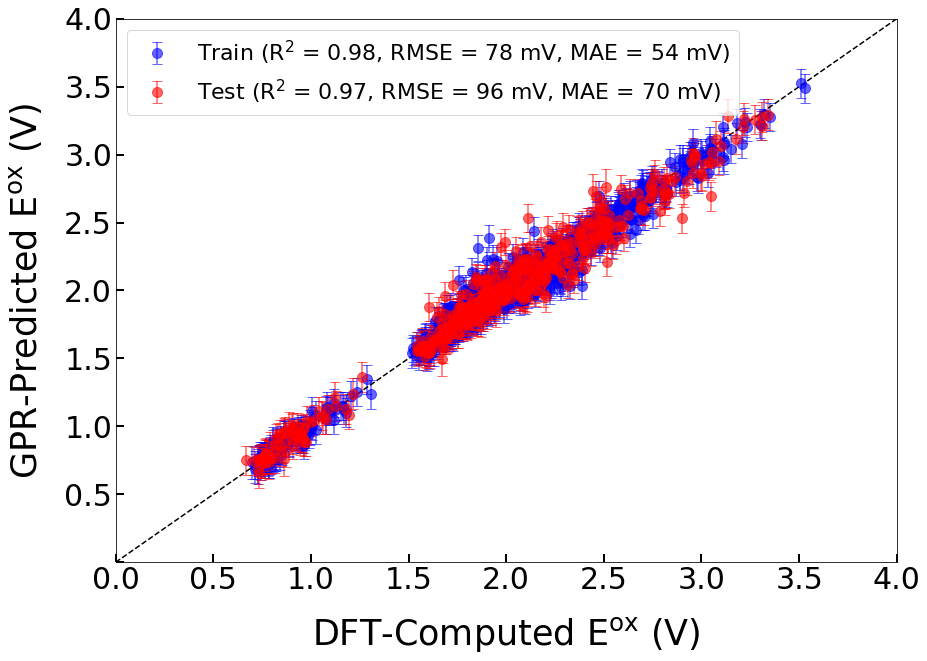

In [27]:
from matplotlib.pyplot import xlim, ylim, axis, xlabel, ylabel, text, title
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
%matplotlib inline

r2Train = round(gpr.score(X_train, y_train),2)
r2Test = round(gpr.score(X_test, y_test),2)
print('Train R2 = {}'.format(r2Train))
print('Test R2 = {}'.format(r2Test))

maeTrain = round(mean_absolute_error(y_train,gpr.predict(X_train)),3)
maeTest = round(mean_absolute_error(y_test,gpr.predict(X_test)),3)
print('Train MAE = {} V'.format(maeTrain))
print('Test MAE = {} V'.format(maeTest))

rmseTrain = round(mean_squared_error(y_train,gpr.predict(X_train))**(1/2),3)
rmseTest = round(mean_squared_error(y_test,gpr.predict(X_test))**(1/2),3)
print('Train RMSE = {}'.format(rmseTrain))
print('Test RMSE = {} V'.format(rmseTest))

fig, ax = plt.subplots()
markerSize = 100
axisLabelSize = 35
tickLabelSize = 30

fig.set_size_inches(14, 10)
ax.tick_params(which='major', direction='in', length=8, width=2, left='on', bottom='on', colors='k')
ax.tick_params(which='minor', direction='in', length=4, width=1, left='on', bottom='on', colors='k')

for label in ax.xaxis.get_ticklabels(): # label is a Text instance
    label.set_fontsize(tickLabelSize)
for label in ax.yaxis.get_ticklabels(): # label is a Text instance
    label.set_fontsize(tickLabelSize)

y_pred, sigma = gpr.predict(X_test, return_std=True) 
yTrain, sigmaTrain = gpr.predict(X_train, return_std=True)
xlabel(r'DFT-Computed E$\rm^{ox}$ (V)', fontsize=axisLabelSize, labelpad=20)
ylabel(r'GPR-Predicted E$\rm^{ox}$ (V)', fontsize=axisLabelSize, labelpad=20)
xlim(0.,4.)
ylim(0.,4.)
plt.plot([0.,4],[0.,4],'k--')

plt.errorbar(y_train, yTrain, yerr= sigmaTrain, fmt='o', capsize=5, c='blue', alpha=0.6, 
             label="Train (R$^2$ = "+str(r2Train)+", RMSE = "+str(int(rmseTrain*1000))+" mV, MAE = "+str(int(maeTrain*1000))+" mV)",ms=10)
plt.errorbar(y_test, y_pred, yerr= sigma, fmt='o', capsize=5, c='red', alpha=0.6, 
             label="Test (R$^2$ = "+str(r2Test)+", RMSE = "+str(int(rmseTest*1000))+" mV, MAE = "+str(int(maeTest*1000))+" mV)",ms=10)
 
plt.legend(loc=2, fontsize=22)
ax = plt.gca()
yticks = ax.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)
fig.savefig('Parity-1400HBEs.png')
plt.show()